# Jupyter Notebook

Consider a single atom coupled to a single cavity mode, as illustrated in the figure below. If there atom excitation rate Γ exceeds the relaxation rate, a population inversion can occur in the atom, and if coupled to the cavity the atom can then act as a photon pump on the cavity.

<img src='https://scipy-lectures.org/_images/random_c.jpg'>

In [126]:
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

# Pandas

In [105]:
import pandas as pd
df = pd.read_excel("titanic1.xlsx")

In [ ]:
df['minor'] = df['age'] < 18

In [ ]:
df.head()

In [20]:
result = df.pivot_table("survived", "class", aggfunc=['sum', 'count'])

# Matplotlib

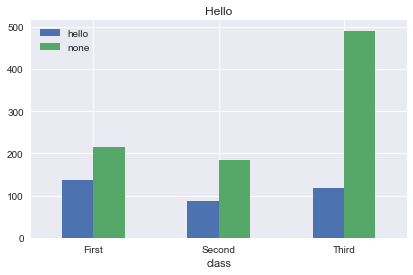

In [127]:
from matplotlib import pyplot as plt
%matplotlib inline

graph = result.plot(kind='bar')
graph.legend(["hello", "none"])

plt.xticks(rotation='horizontal')
plt.style.use("seaborn")
plt.title("Hello")

plt.savefig('test.pdf')

In [133]:
url = "https://www.quandl.com/api/v3/datasets/EOD/AAPL.csv"
query_string = "?api_key=K2km7t6m9xhmYRD7zCPY"
df = pd.read_csv(url+query_string, parse_dates=['Date'], index_col='Date')

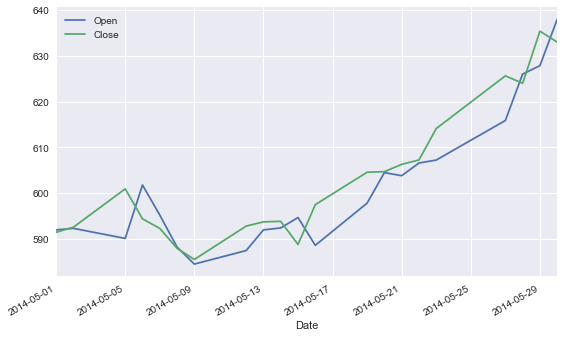

In [140]:
df['2014-05'][['Open', 'Close']].plot()

# Sci-Kit Learn

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [99]:
model = LogisticRegression(solver="lbfgs")

In [110]:
columns = ['gender','age', 'pclass']
clean = df.dropna()

model.fit(clean[columns],clean['survived'])

model.predict([[1, 30, 2]])

array([0])

In [114]:
confusion_matrix(model.predict(clean[columns]), clean['survived'])

array([[ 38,  18],
       [ 21, 105]])